## Домашнее задание «Временные ряды, общая теория» (Знакомство с временными рядами)

### Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

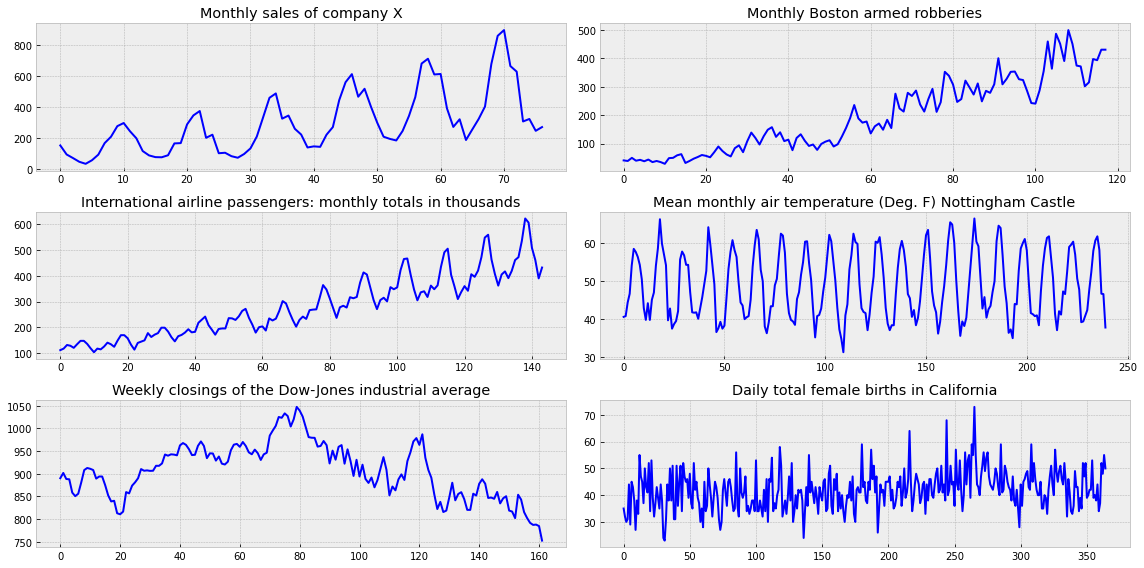

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [5]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def tsplot(y, k, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title((k + " " +'Original'))

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        
    return plt.tight_layout()

Monthly sales of company X
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

International airline passengers: monthly totals in thousands
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-valu

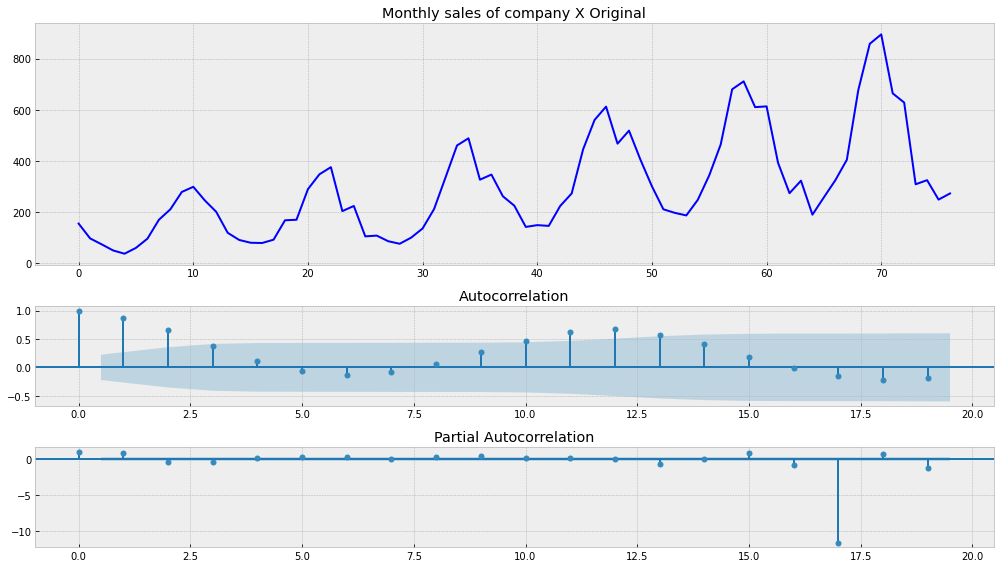

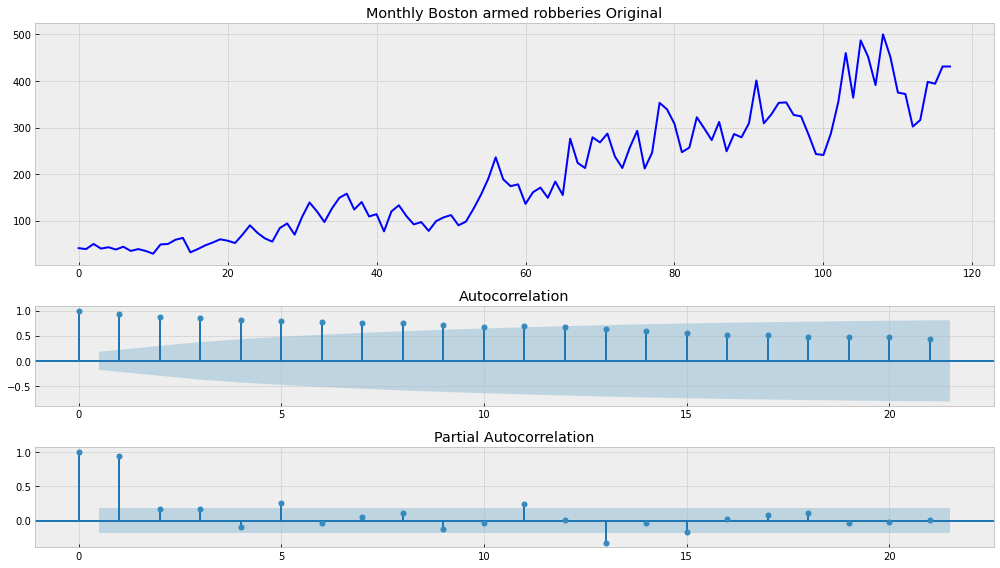

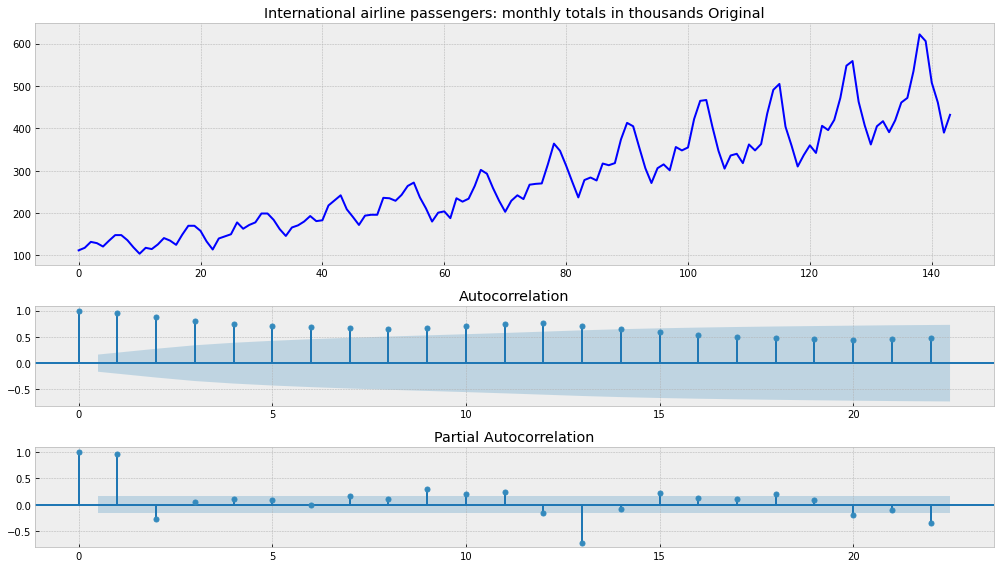

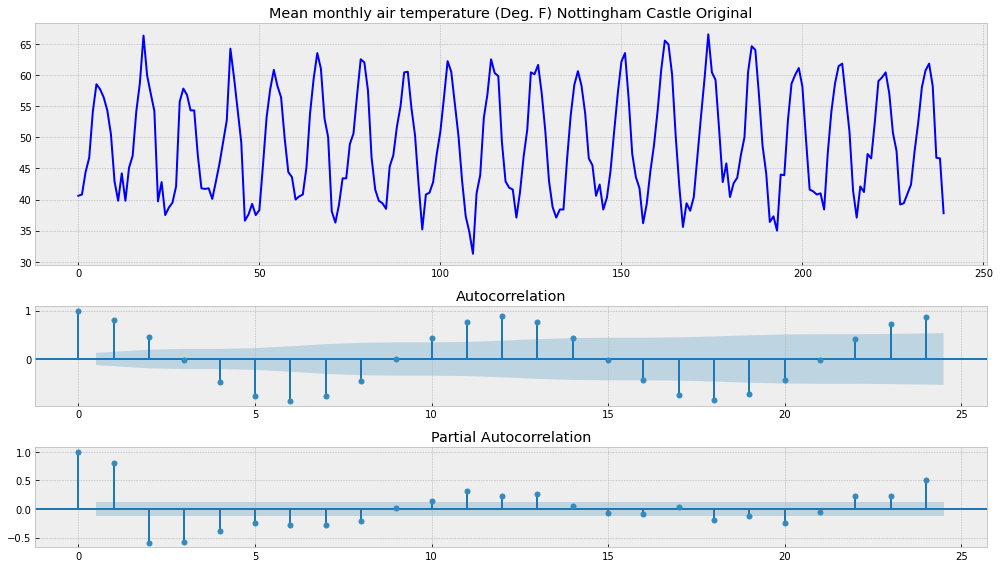

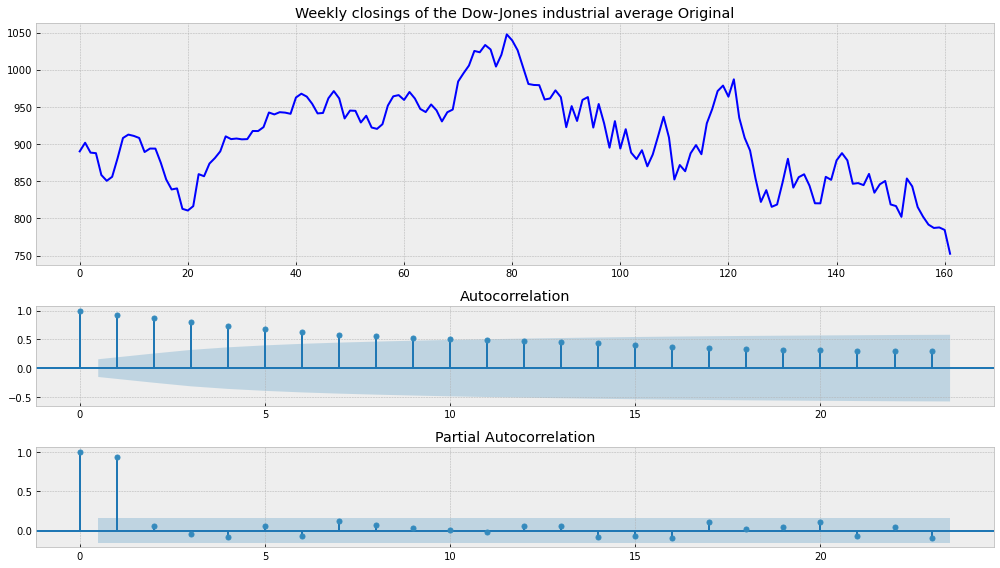

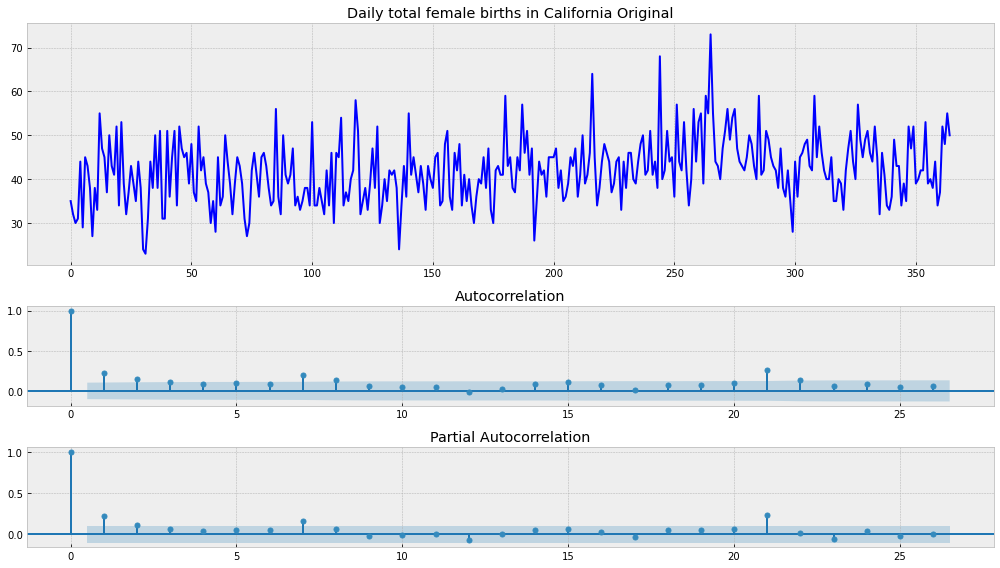

In [7]:
for k in all_series:
    print(k)
    print('_________________________________________')
    tsplot(all_series[k], k)
    print()

Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности рядов:
- Monthly sales of company X
- Monthly Boston armed robberies
- International airline passengers: monthly totals in thousands
- Weekly closings of the Dow-Jones industrial average

Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [8]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],   
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    }

Monthly sales of company X
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

International airline passengers: monthly totals in thousands
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-valu

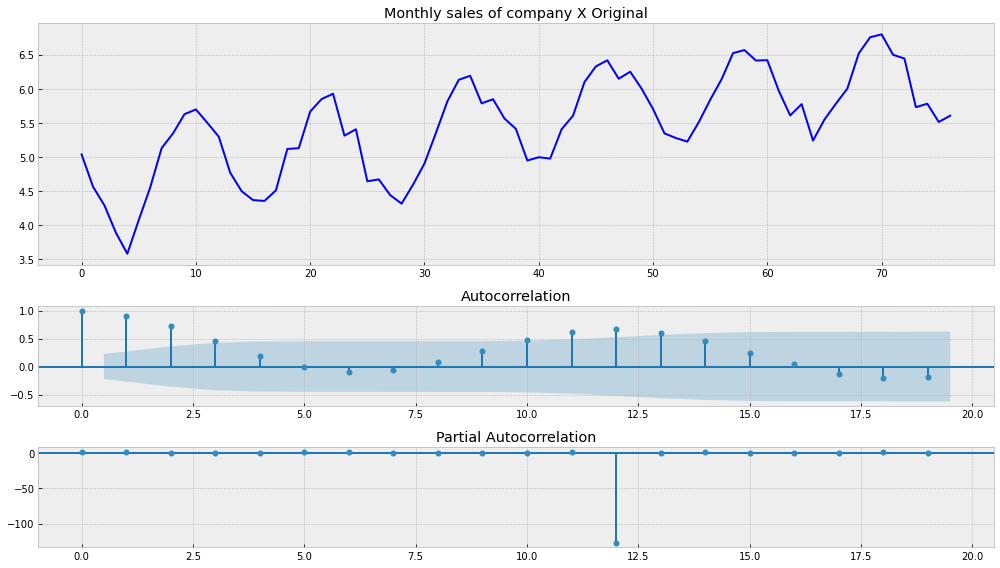

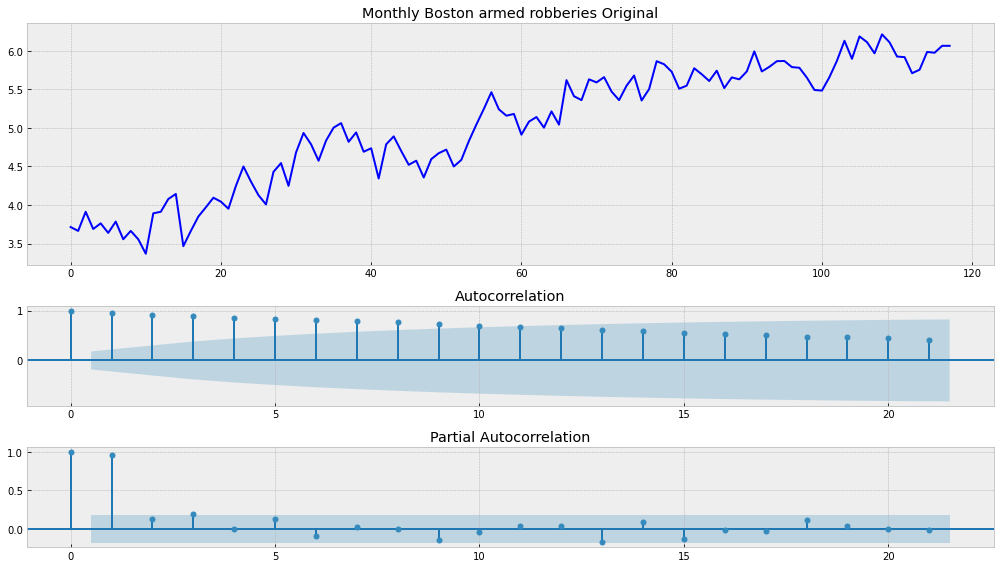

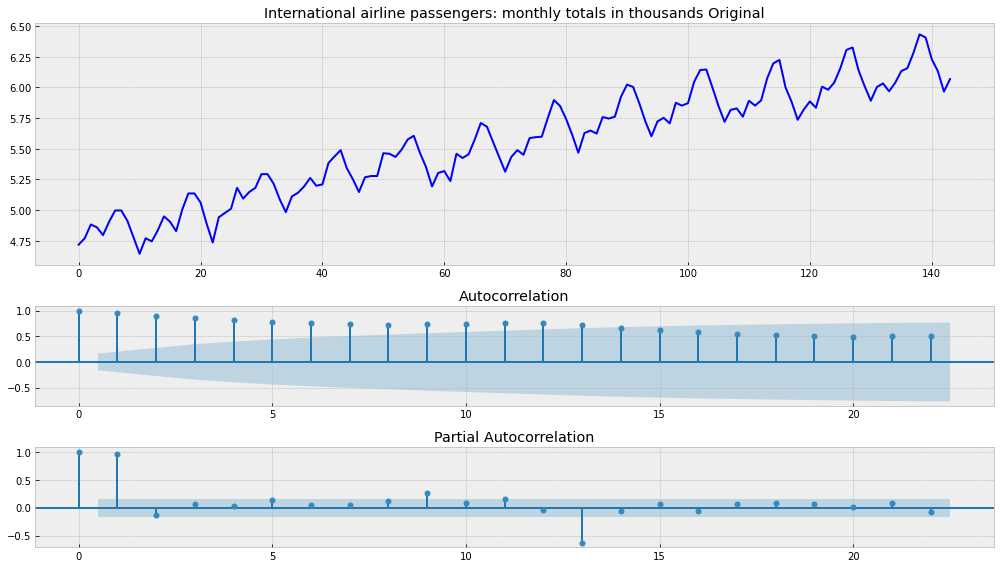

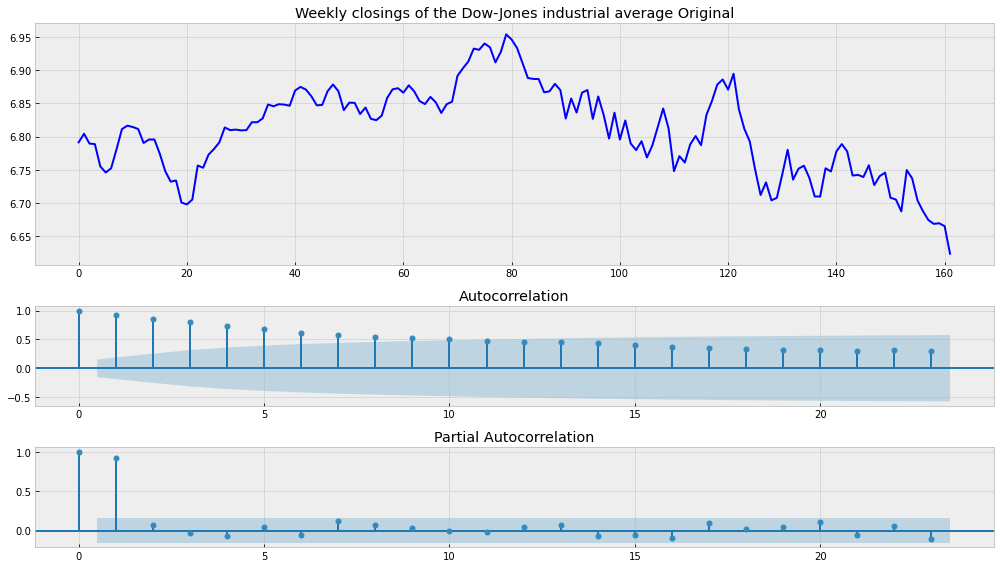

In [9]:
for k in all_series:
    series = boxcox(all_series[k], 0)
    all_series[k]=series   
    print(k)
    print('_________________________________________')
    tsplot(series, k)
    print()

Удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности рядов.

По графикам рядов видно наличие сильного тренда. Уберем его.

Monthly sales of company X
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

International airline passengers: monthly totals in thousands
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                  -2

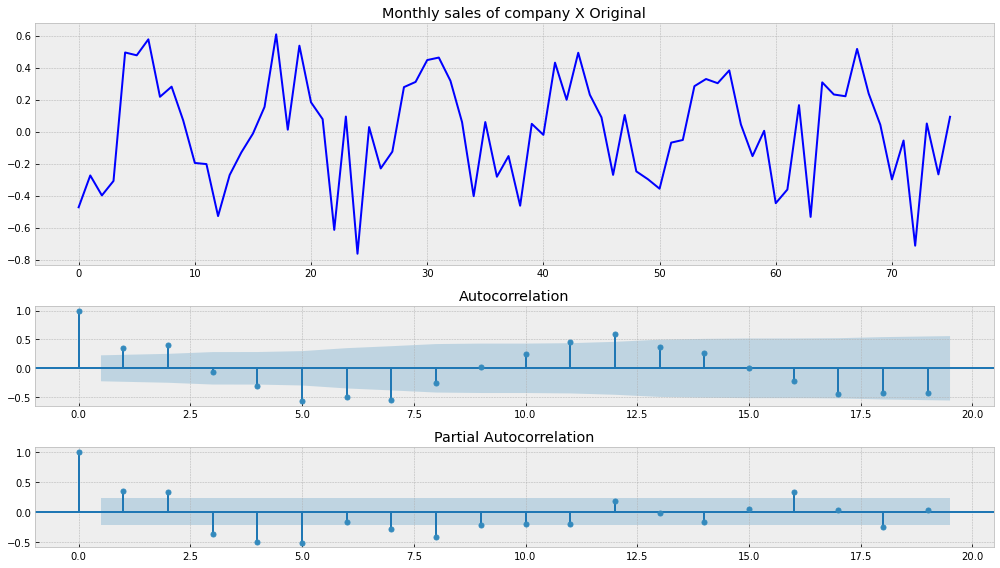

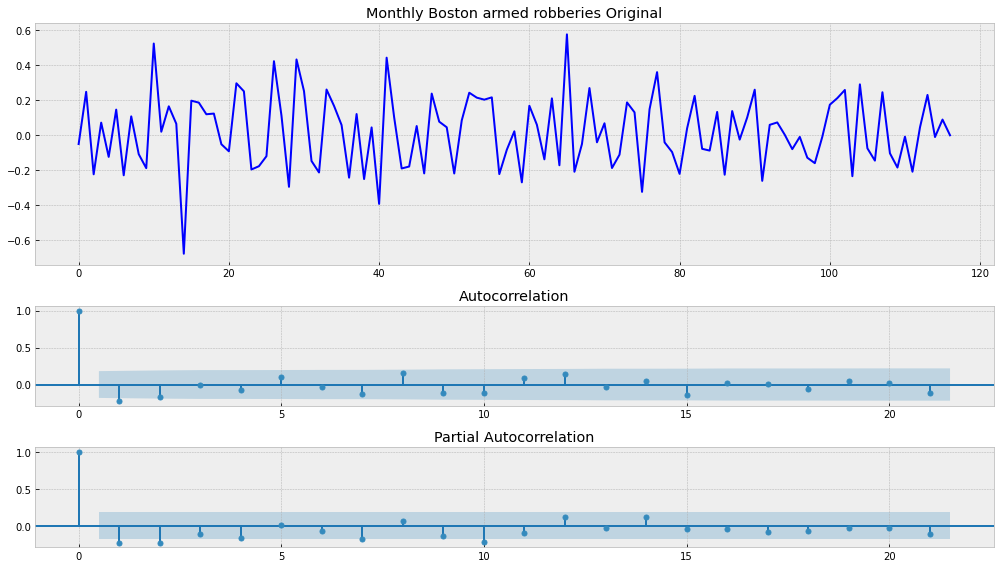

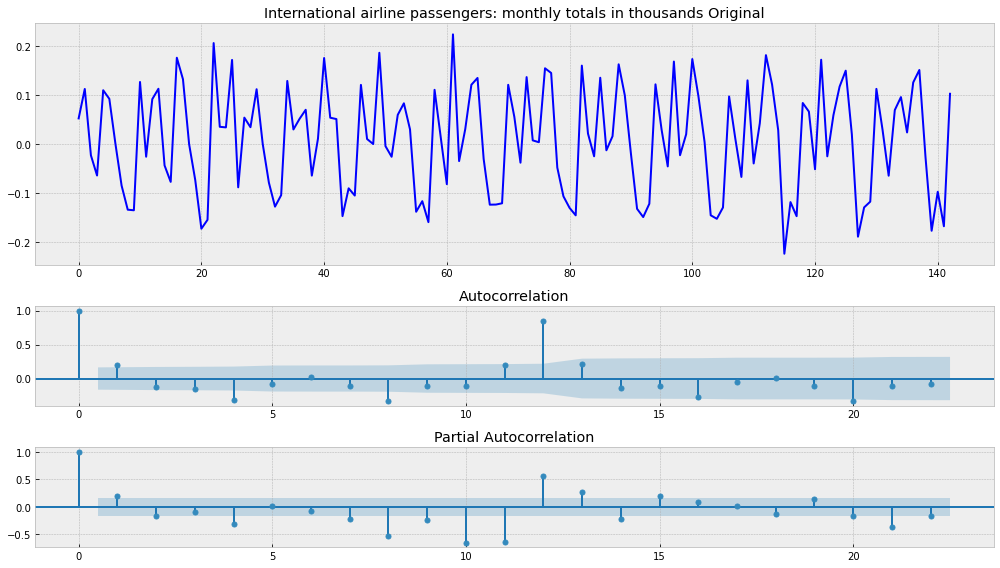

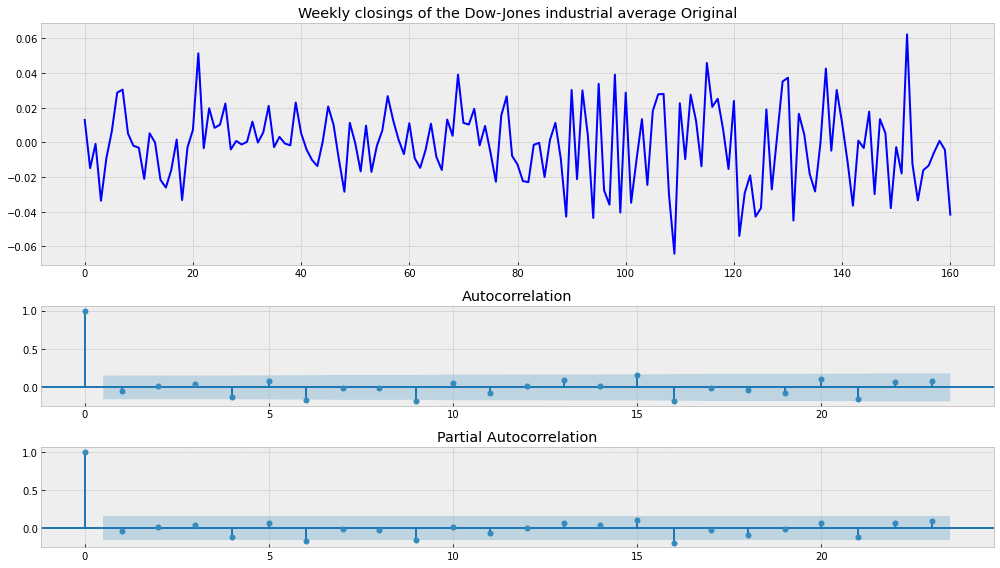

In [11]:
for k in all_series:
    series = all_series[k][1:] - all_series[k][:-1]
    all_series[k]=series   
    print(k)
    print('_________________________________________')
    tsplot(series, k)
    print()

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности рядов:
- Monthly Boston armed robberies
- Weekly closings of the Dow-Jones industrial average 

По графикам коррелограммы рядов
- Monthly sales of company X
- International airline passengers: monthly totals in thousan. 
видно сильное влияние сезонности. Уберем ее.

Monthly sales of company X
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64



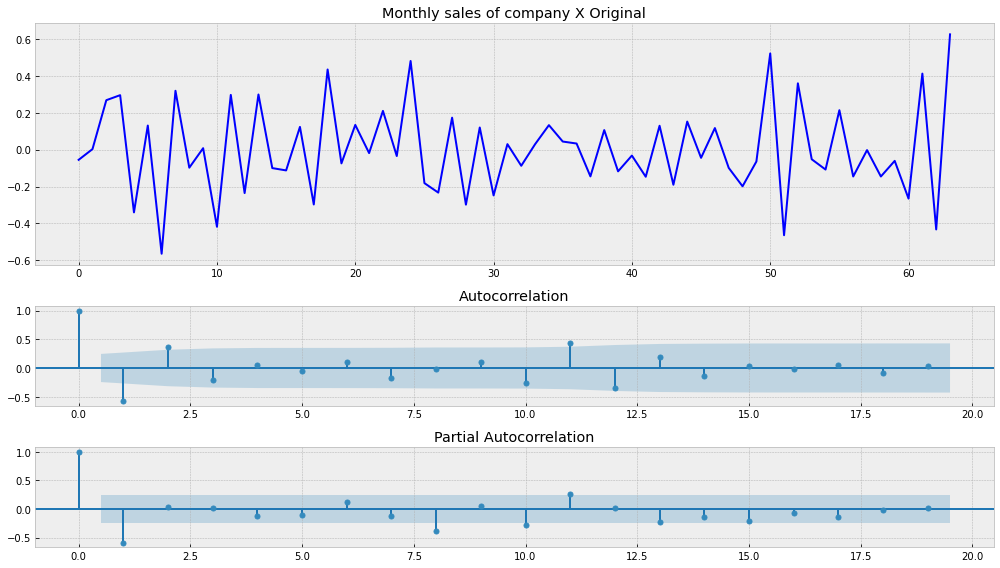

In [12]:
series1 = all_series['Monthly sales of company X'][12:] - all_series['Monthly sales of company X'][:-12]
print('Monthly sales of company X')
print('_________________________________________')
tsplot(series1, 'Monthly sales of company X')
print()

International airline passengers: monthly totals in thousands
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64



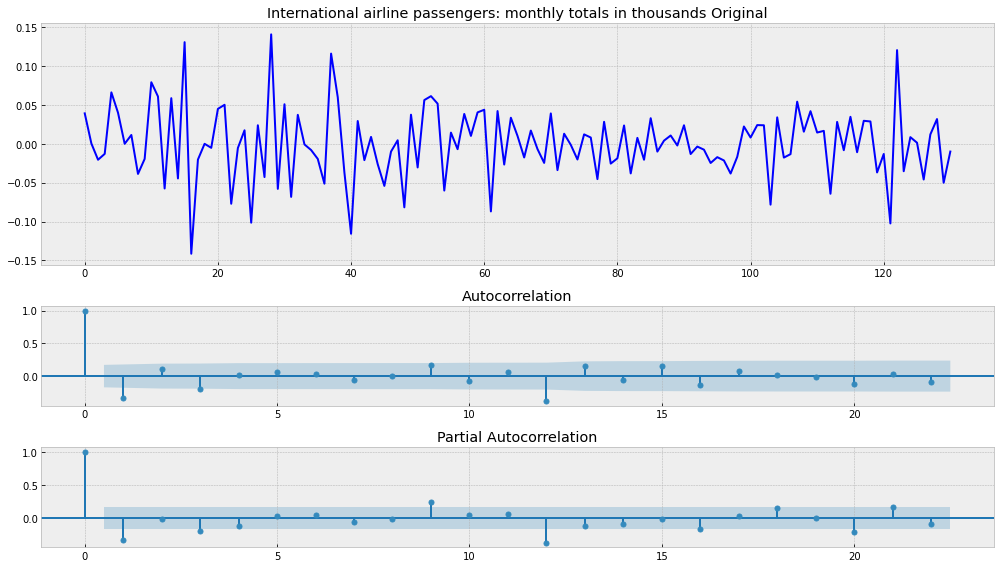

In [13]:
series2 = all_series['International airline passengers: monthly totals in thousands'][12:] - all_series['International airline passengers: monthly totals in thousands'][:-12]
print('International airline passengers: monthly totals in thousands')
print('_________________________________________')
tsplot(series2, 'International airline passengers: monthly totals in thousands')
print()

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда:
- International airline passengers: monthly totals in thousands

Диференцируем ряд:
- Monthly sales of company X

Monthly sales of company X
_________________________________________
Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64



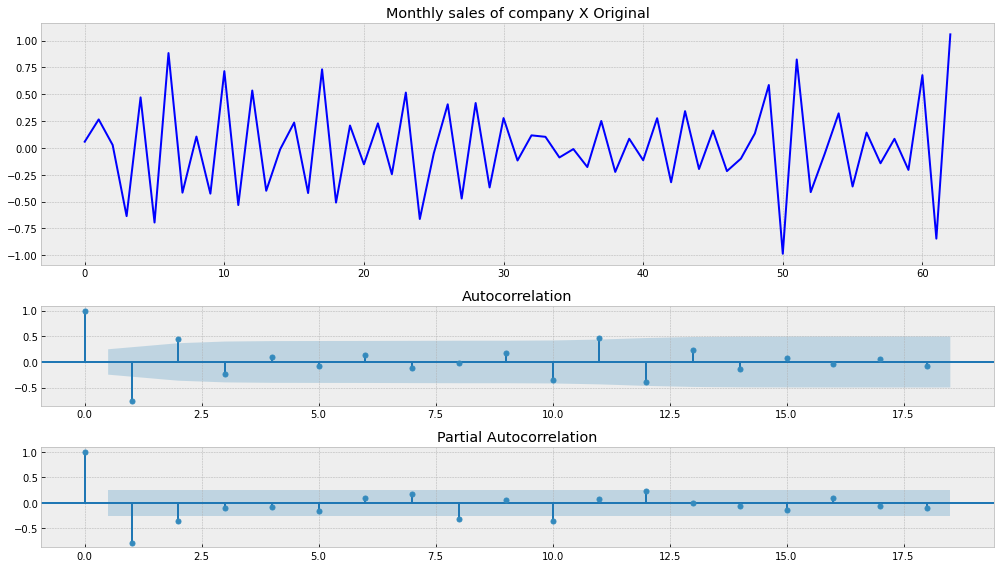

In [15]:
series1 = np.diff(series1, 1)
print('Monthly sales of company X')
print('_________________________________________')
tsplot(series1, 'Monthly sales of company X')
print()

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда:
- Monthly sales of company X

### Все ряды приведены к стационарному виду